In [1]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start = dt.date(2017, 7, 1)
end = dt.date(2022, 7, 1)
asssts = ['BTC-USD', 'GC=F', 'SI=F', '^GSPC']

In [3]:
df = reader.get_data_yahoo(asssts, start, end)['Close']

In [4]:
df.head()

Symbols,BTC-USD,GC=F,SI=F,^GSPC
Date,,,,
2017-06-30,2480.840088,1240.699951,16.568001,2423.409912
2017-07-01,2434.550049,NaN,NaN,NaN
2017-07-02,2506.469971,NaN,NaN,NaN
2017-07-03,2564.060059,1217.900024,16.037001,2429.010010
2017-07-04,2601.639893,NaN,NaN,NaN


In [5]:
df.rename(columns={'GC=F': 'Gold', 'SI=F': 'Silver', '^GSPC':'S&P500'}, inplace=True)

# Price chart of each asset class over the last 5 years

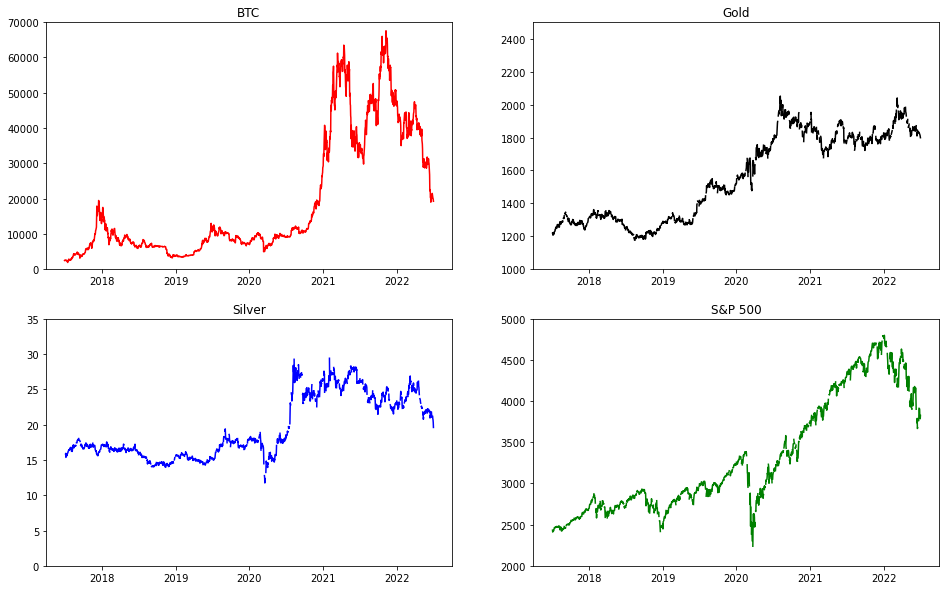

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.2})
axs[0, 0].plot(df['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 0].set_ylim([0, 70000])
axs[0, 1].plot(df['Gold'], c='k')
axs[0, 1].set_title('Gold')
axs[0, 1].set_ylim([1000, 2500])
axs[1, 0].plot(df['Silver'], c='b')
axs[1, 0].set_title('Silver')
axs[1, 0].set_ylim([0, 35])
axs[1, 1].plot(df['S&P500'], c='g')
axs[1, 1].set_title('S&P 500')
axs[1, 1].set_ylim([2000, 5000])
plt.show()

# To compare each asset, we will look at daily price change in percentage.

In [7]:
daily_change = df.pct_change().dropna(axis=0)
daily_change

Symbols,BTC-USD,Gold,Silver,S&P500
Date,,,,
2017-07-01,-0.018659,0.000000,0.000000,0.000000
2017-07-02,0.029541,0.000000,0.000000,0.000000
2017-07-03,0.022977,-0.018377,-0.032050,0.002311
2017-07-04,0.014656,0.000000,0.000000,0.000000
2017-07-05,0.000135,0.002053,-0.012159,0.001453
...,...,...,...,...
2022-06-27,-0.013878,-0.003066,0.002036,-0.002973
2022-06-28,-0.021936,-0.001867,-0.017109,-0.020143
2022-06-29,-0.008708,-0.002091,-0.006203,-0.000712


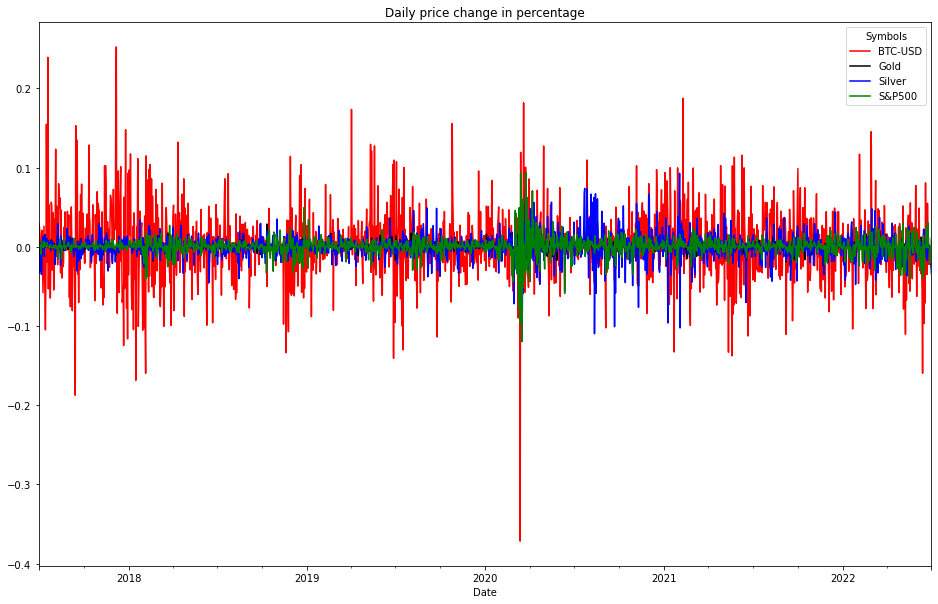

In [8]:
colors = ['r', 'k', 'b', 'g']
daily_change.plot(color=colors, figsize=(16, 10))
plt.title('Daily price change in percentage')
plt.show()

# Bitcoin seems more volatile than others, but it's hard to compare other three assets. Let's see them on each individual chart.

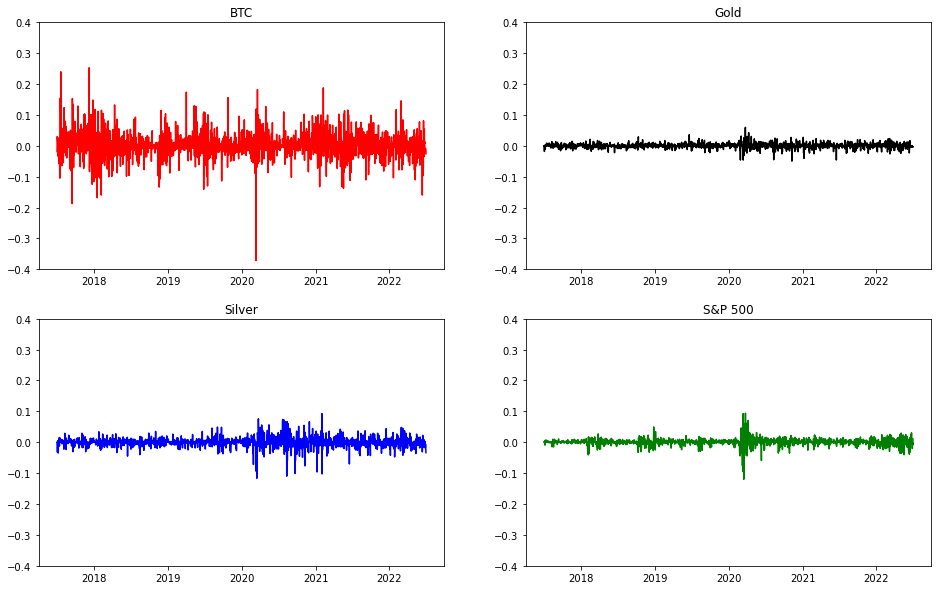

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.2})
axs[0, 0].plot(daily_change['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 0].set_ylim([-0.4, 0.4])
axs[0, 1].plot(daily_change['Gold'], c='k')
axs[0, 1].set_title('Gold')
axs[0, 1].set_ylim([-0.4, 0.4])
axs[1, 0].plot(daily_change['Silver'], c='b')
axs[1, 0].set_title('Silver')
axs[1, 0].set_ylim([-0.4, 0.4])
axs[1, 1].plot(daily_change['S&P500'], c='g')
axs[1, 1].set_title('S&P 500')
axs[1, 1].set_ylim([-0.4, 0.4])
plt.show()

# How is each asset return distributed?

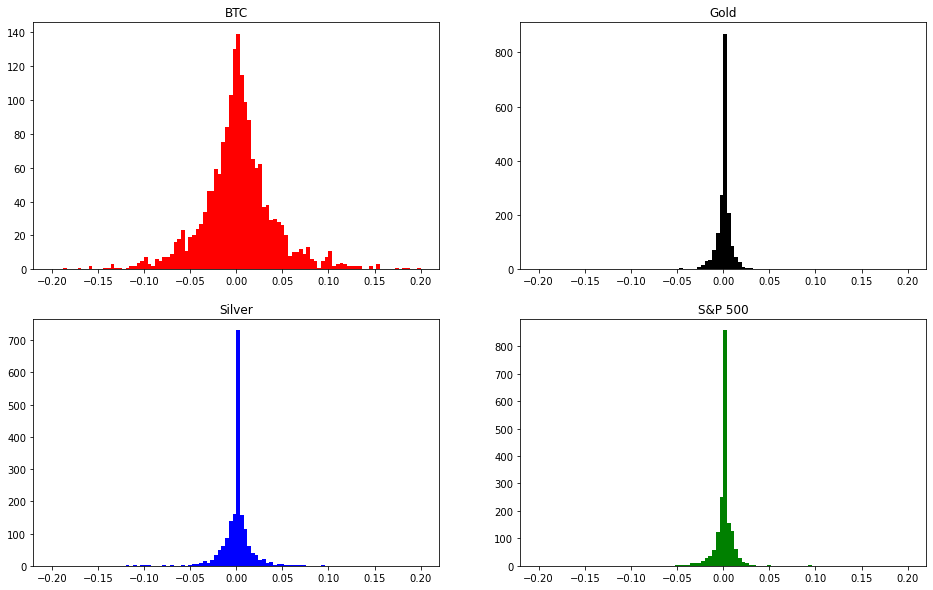

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.2})
axs[0, 0].hist(daily_change['BTC-USD'], color='r', bins=100, range=(-0.2, 0.2))
axs[0, 0].set_title('BTC')
axs[0, 1].hist(daily_change['Gold'], color='k', bins=100, range=(-0.2, 0.2))
axs[0, 1].set_title('Gold')
axs[1, 0].hist(daily_change['Silver'], color='b', bins=100, range=(-0.2, 0.2))
axs[1, 0].set_title('Silver')
axs[1, 1].hist(daily_change['S&P500'], color='g', bins=100, range=(-0.2, 0.2))
axs[1, 1].set_title('S&P 500')
plt.show()

# Is there outlier?

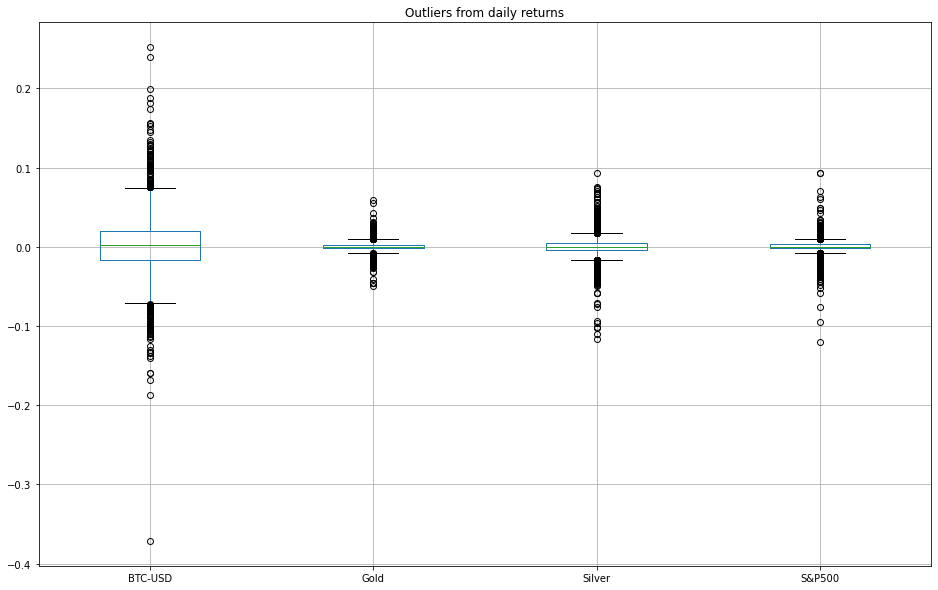

In [11]:
daily_change.boxplot(figsize=(16, 10))
plt.title('Outliers from daily returns')
plt.show()

# What are correlations on these assets?

In [12]:
daily_change.corr()

Symbols,BTC-USD,Gold,Silver,S&P500
Symbols,,,,
BTC-USD,1.000000,0.082256,0.107702,0.224455
Gold,0.082256,1.000000,0.788179,0.042224
Silver,0.107702,0.788179,1.000000,0.141645
S&P500,0.224455,0.042224,0.141645,1.000000


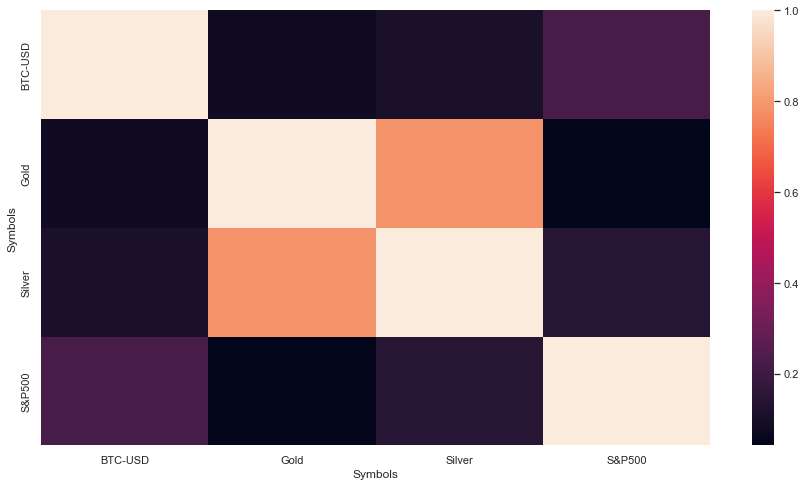

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(daily_change.corr())
plt.show()

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
!pip install pystan==2.19.1.1 prophet

In [16]:
from prophet import Prophet

In [17]:
end1 = dt.date(end.year - 1, end.month, end.day)
end2 = dt.date(end.year, end.month - 6, end.day)
start1 = dt.date(end1.year - 3, end.month, end.day)

In [18]:
df1 = reader.get_data_yahoo('BTC-USD', start1, end1)['Adj Close']
df2 = reader.get_data_yahoo('BTC-USD', start1, end2)['Adj Close']

In [19]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

In [20]:
df2.head()

,Adj Close
Date,
2018-06-30,6404.000000
2018-07-01,6385.819824
2018-07-02,6614.180176
2018-07-03,6529.589844
2018-07-04,6597.549805


In [21]:
df1.head()

,Adj Close
Date,
2018-06-30,6404.000000
2018-07-01,6385.819824
2018-07-02,6614.180176
2018-07-03,6529.589844
2018-07-04,6597.549805


In [22]:
modelfb1 = Prophet()
df1 = df1.reset_index()
df1[['ds', 'y']] = df1[['Date', 'Adj Close']]
modelfb1.fit(df1)

08:53:03 - cmdstanpy - INFO - Chain [1] start processing
08:53:03 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds', 'y']] = df2[['Date', 'Adj Close']]
modelfb2.fit(df2)

08:53:03 - cmdstanpy - INFO - Chain [1] start processing
08:53:04 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future1 = modelfb1.make_future_dataframe(periods=365)
future2 = modelfb2.make_future_dataframe(periods=180)

In [25]:
forecast1 = modelfb1.predict(future1)
forecast2 = modelfb2.predict(future2)

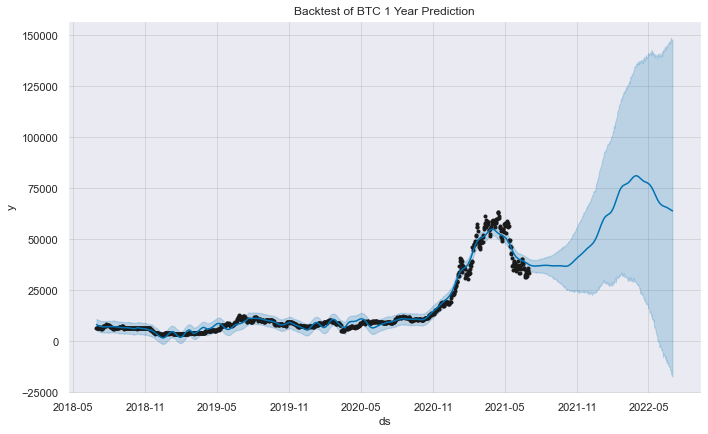

In [26]:
modelfb1.plot(forecast1)
plt.title('Backtest of BTC 1 Year Prediction')
plt.show()

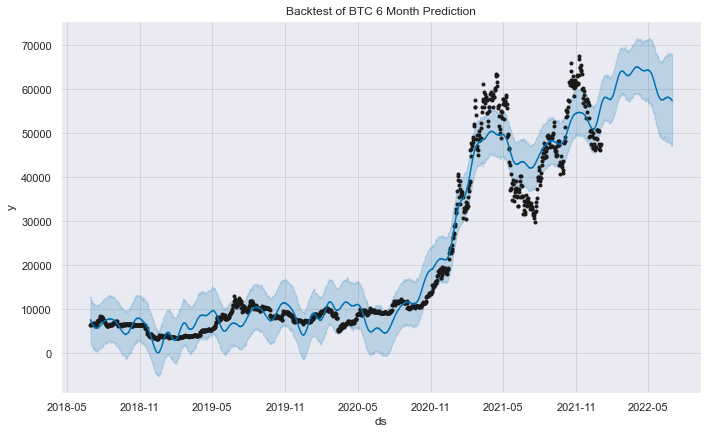

In [27]:
modelfb2.plot(forecast2)
plt.title('Backtest of BTC 6 Month Prediction')
plt.show()

In [28]:
modelfb3 = Prophet()
df3 = df.reset_index()
df3[['ds', 'y']] = df3[['Date', 'BTC-USD']]
modelfb3.fit(df3)

08:53:06 - cmdstanpy - INFO - Chain [1] start processing
08:53:06 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future3 = modelfb3.make_future_dataframe(periods=180)

In [30]:
forecast3 = modelfb3.predict(future3)

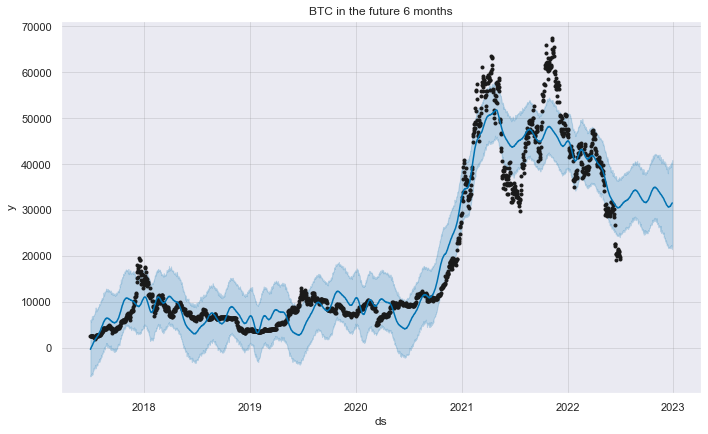

In [31]:
modelfb3.plot(forecast3)
plt.title('BTC in the future 6 months')
plt.show()

# Do these asset returns explain each other?

In [32]:
import statsmodels.api as sm

In [33]:
y = daily_change['BTC-USD']
x1 = daily_change['Gold']
x2 = daily_change[['Gold', 'Silver']]
x3 = daily_change[['Gold', 'Silver', 'S&P500']]

x1 = sm.add_constant(x1)
x2 = sm.add_constant(x2)
x3 = sm.add_constant(x3)

In [34]:
model1 = sm.OLS(y, x1)
model2 = sm.OLS(y, x2)
model3 = sm.OLS(y, x3)

result1 = model1.fit()
result2 = model2.fit()
result3 = model3.fit()

In [35]:
result1.rsquared

0.00676609590507582

In [36]:
result2.rsquared

0.01161800144051528

In [37]:
result3.rsquared

0.05665729276353859